# Import the and clean data

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
coherences = pd.read_excel("Coherence results_controls and patients.xlsx")

coherences = coherences.drop('filter_$',axis=1)

coherences.head()

,Group,Subject,Coherence,Connection,Condition
0,1,AVB,0.623330,1,1
1,1,CRB,0.492470,1,1
2,1,DSL,0.528885,1,1
3,1,EGW,0.481590,1,1
4,1,JAF,0.567595,1,1


## Change column values to real categories

In [49]:
from functools import partial
print("Connection Unique Values:",coherences['Connection'].unique())
print("Condition Unique Values:",coherences['Condition'].unique())
print("Group Unique Values:",coherences['Group'].unique())

#Enter the names to replace the numbers with 
connections = ['SMA-Motor','SMA-Visual','Motor-Visual']
conditions = ['Sham','Anode','Cathode','Visual','Sham Baseline']
groups = ['Control','Patient']

def changeValues(x,values=connections,unique=coherences['Connection'].unique()):
    return values[np.where(unique==x)[0][0]]


#Apply it on the df
#Change connections
change = partial(changeValues,values=connections,unique=coherences['Connection'].unique())
coherences['Connection'] = coherences['Connection'].apply(change)
#change conditions
change = partial(changeValues,values=conditions,unique=coherences['Condition'].unique())
coherences['Condition'] = coherences['Condition'].apply(change)
#change groups
change = partial(changeValues,values=groups,unique=coherences['Group'].unique())
coherences['Group'] = coherences['Group'].apply(change)

print("\n")
print("New Unique Values")
print("Connection Unique Values:",coherences['Connection'].unique())
print("Condition Unique Values:",coherences['Condition'].unique())
print("Group Unique Values:",coherences['Group'].unique())

Connection Unique Values: [1 2 3]
Condition Unique Values: [1 2 3 4 5]
Group Unique Values: [1 2]


New Unique Values
Connection Unique Values: ['SMA-Motor' 'SMA-Visual' 'Motor-Visual']
Condition Unique Values: ['Sham' 'Anode' 'Cathode' 'Visual' 'Sham Baseline']
Group Unique Values: ['Control' 'Patient']


## Create a hierarchial dataset

In [50]:
coherences = coherences.set_index(['Group','Condition','Connection'])
#coherences.head(10)

# Find Means and stdev

In [51]:
grouped = coherences.groupby(level=['Group','Condition','Connection'])
coherences['mean'] = grouped['Coherence'].transform('mean')
coherences['sem'] = grouped['Coherence'].transform('sem')

coherences.head(-10)
#summary = grouped.describe()

Subject  Coherence      mean       sem
Group   Condition     Connection                                         
Control Sham          SMA-Motor        AVB   0.623330  0.511903  0.022865
                      SMA-Motor        CRB   0.492470  0.511903  0.022865
                      SMA-Motor        DSL   0.528885  0.511903  0.022865
                      SMA-Motor        EGW   0.481590  0.511903  0.022865
                      SMA-Motor        JAF   0.567595  0.511903  0.022865
...                                    ...        ...       ...       ...
Patient Sham Baseline Motor-Visual     EBP   0.234970  0.163184  0.020057
                      Motor-Visual     GSP   0.041000  0.163184  0.020057
                      Motor-Visual     JAM   0.289820  0.163184  0.020057
                      Motor-Visual     JCM   0.127860  0.163184  0.020057
                      Motor-Visual     JOS   0.154710  0.163184  0.020057

[596 rows x 4 columns]

In [56]:
#How to index the columns
print(coherences.loc[('Control','Sham','SMA-Motor')]['mean'][0])
print(coherences.loc[('Control','Sham','SMA-Motor')]['sem'][0])

0.511903125
0.022864888848566304


<ipython-input-56-7c3f74227f5f>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(coherences.loc[('Control','Sham','SMA-Motor')]['mean'][0])
<ipython-input-56-7c3f74227f5f>:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(coherences.loc[('Control','Sham','SMA-Motor')]['sem'][0])


# Plot the bar graphs

<ipython-input-120-2ac09110dc92>:14: PerformanceWarning: indexing past lexsort depth may impact performance.
  SE.append(coherences.loc[(g,cond,conn)]['sem'][0])


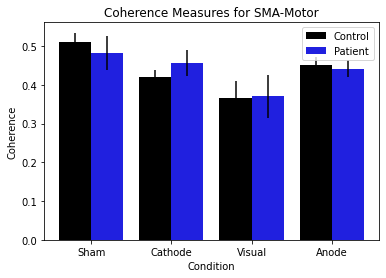

<ipython-input-120-2ac09110dc92>:14: PerformanceWarning: indexing past lexsort depth may impact performance.
  SE.append(coherences.loc[(g,cond,conn)]['sem'][0])


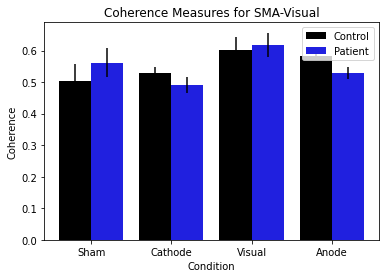

<ipython-input-120-2ac09110dc92>:14: PerformanceWarning: indexing past lexsort depth may impact performance.
  SE.append(coherences.loc[(g,cond,conn)]['sem'][0])


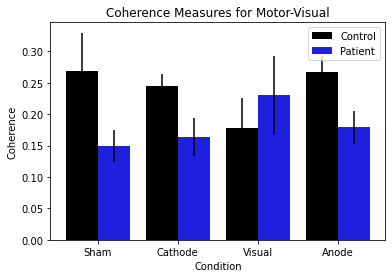

In [120]:
import seaborn as sns

#Create the lists we want to iterate over
connections = ['SMA-Motor','SMA-Visual','Motor-Visual']
conditions = ['Sham','Cathode','Visual','Anode']
groups = ['Control','Patient']
data = coherences.reset_index()#reset the indecies
for conn in connections:
    df = data[(data['Connection'] == conn) & (data['Condition'] != 'Sham Baseline')]
    #Now we can make the bar plot
    SE = []
    for cond in conditions:
        for g in groups:
            SE.append(coherences.loc[(g,cond,conn)]['sem'][0])
    plt.clf()
    #colors = ['grey','black','lightskyblue','blue','limegreen','green','tomato','red']
    colors = ['black','blue','green','red']
    ax = sns.barplot(x='Condition', y='Coherence', hue='Group', data=df,ci=None,order=conditions,palette=colors)
    #Add error bars

    x_coords = [p.get_x() + 0.5*p.get_width() for p in ax.patches]
    y_coords = [p.get_height() for p in ax.patches]
    plt.errorbar(x=x_coords, y=y_coords, yerr=SE, fmt="none", c= "k")

    plt.legend(loc=1)
    plt.title("Coherence Measures for {}".format(conn))
    plt.show()
    
    
    ### TODO: Create barplots with matplotlib so you can have more control